In [2]:
#Read data
import pandas as pd

#Train data
train = pd.read_csv('/Users/jigyasasachdeva/Desktop/Data/train.csv', index_col = 0)
X = train.loc[:, train.columns != 'CARAVAN']
y = train['CARAVAN'].astype('category')

#Test data
test = pd.read_csv('/Users/jigyasasachdeva/Desktop/Data/test.csv', index_col = 0)
X_test = test.loc[:, test.columns != 'CARAVAN']
y_test = test['CARAVAN'].astype('category')

#SMOTE train data
smote_data = pd.read_csv('/Users/jigyasasachdeva/Desktop/Data/SMOTE_traindata.csv', index_col = 0)
X1 = smote_data.loc[:, smote_data.columns != 'CARAVAN']
y1 = smote_data['CARAVAN'].astype('category')

In [3]:
#Baseline Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

#Fitting base logistic
base = LogisticRegression(random_state=88)
base.fit(X,y)
#predicting on test data
y_pred = base.predict(X_test)

# performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
Acc_base = accuracy_score(y_test,y_pred)
ROC_AUC_base = roc_auc_score(y_test, y_pred)
Recall_base = recall_score(y_test,y_pred)
Precision_base = precision_score(y_test,y_pred)
F1_base = f1_score(y_test,y_pred)
Acc_base, ROC_AUC_base, Recall_base, Precision_base, F1_base

Confusion Matrix: 
[[3759    3]
 [ 235    3]]
Accuracy Score: 0.9405
Area Under Curve: 0.5059037969254687
Recall score: 0.012605042016806723
Precision score: 0.5
F1 score: 0.024590163934426233


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9405, 0.5059037969254687, 0.012605042016806723, 0.5, 0.024590163934426233)

In [4]:
from sklearn.metrics import auc
base_p = base.predict_proba(X_test)
base_p = base_p[:, 1]
y_pred = base.predict(X_test)
#Precision recall curve
base_precision, base_recall, _ = precision_recall_curve(y_test, base_p)
base_f1, base_auc = f1_score(y_test, y_pred), auc(base_recall, base_precision)

In [5]:
#Final Logistic Regression

logit_6 = LogisticRegression(random_state=77,
                         class_weight={0: 1.0, 1: 10},
                         penalty='l2',
                         fit_intercept=True,
                         C=1.5)
# fit it
logit_6.fit(X,y)
# test
y_pred = logit_6.predict(X_test)

# performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
Acc_lr = accuracy_score(y_test,y_pred)
ROC_AUC_lr = roc_auc_score(y_test, y_pred)
Recall_lr = recall_score(y_test,y_pred)
Precision_lr = precision_score(y_test,y_pred)
F1_lr = f1_score(y_test,y_pred)

Confusion Matrix: 
[[3114  648]
 [ 120  118]]
Accuracy Score: 0.808
Area Under Curve: 0.66177475774999
Recall score: 0.4957983193277311
Precision score: 0.15404699738903394
F1 score: 0.23505976095617528


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
lr_p = logit_6.predict_proba(X_test)
lr_p = lr_p[:, 1]
y_pred = logit_6.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_p)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

In [7]:
#Final Random Forest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 10, 
                               min_samples_split= 2, 
                               min_samples_leaf= 1, 
                               max_features= 81, 
                               max_depth= 36, 
                               bootstrap= True)
rf_model.fit(X, y)
y_pred = rf_model.predict(X_test)

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test,y_pred)}')
Acc_rf = accuracy_score(y_test,y_pred)
ROC_AUC_rf = roc_auc_score(y_test, y_pred)
Recall_rf = recall_score(y_test,y_pred)
Precision_rf = precision_score(y_test,y_pred)
F1_rf = f1_score(y_test,y_pred)

Confusion Matrix: 
[[3700   62]
 [ 220   18]]
Accuracy Score: 0.9295
Area Under Curve: 0.5295748283364382
Recall score: 0.07563025210084033
Precision score: 0.225
F1 score: 0.11320754716981131


In [8]:
rf_p = rf_model.predict_proba(X_test)
rf_p = rf_p[:, 1]
y_pred = rf_model.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_p)
rf_f1, rf_auc = f1_score(y_test, y_pred), auc(rf_recall, rf_precision)

In [9]:
#SVM (r)
from sklearn.svm import SVC
svc_bestfit = SVC(random_state=13,
                  C=0.125,
                  kernel = 'linear',
                  probability = True, 
                  class_weight={0: 1.05, 1: 20})
svc_bestfit.fit(X,y)
y_pred = svc_bestfit.predict(X_test)

# performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test,y_pred)}')
Acc_svm = accuracy_score(y_test,y_pred)
ROC_AUC_svm = roc_auc_score(y_test, y_pred)
Recall_svm = recall_score(y_test,y_pred)
Precision_svm = precision_score(y_test,y_pred)
F1_svm = f1_score(y_test,y_pred)

Confusion Matrix: 
[[2380 1382]
 [  77  161]]
Accuracy Score: 0.63525
Area Under Curve: 0.6545563999124371
Recall score: 0.6764705882352942
Precision score: 0.10434219053791316
F1 score: 0.18079730488489612


In [10]:
svm_p = svc_bestfit.predict_proba(X_test)
svm_p = svm_p[:, 1]
y_pred = svc_bestfit.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_p)
svm_f1, svm_auc = f1_score(y_test, y_pred), auc(svm_recall, svm_precision)

In [11]:
#KNN (on SMOTE)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)
y_pred = knn.predict(X_test)

# performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test,y_pred)}')
Acc_knn = accuracy_score(y_test,y_pred)
ROC_AUC_knn = roc_auc_score(y_test, y_pred)
Recall_knn = recall_score(y_test,y_pred)
Precision_knn = precision_score(y_test,y_pred)
F1_knn = f1_score(y_test,y_pred)

Confusion Matrix: 
[[3385  377]
 [ 186   52]]
Accuracy Score: 0.85925
Area Under Curve: 0.5591373710568758
Recall score: 0.2184873949579832
Precision score: 0.12121212121212122
F1 score: 0.15592203898050977


In [14]:
knn_p = knn.predict_proba(X_test)
knn_p = knn_p[:, 1]
y_pred = knn.predict(X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_p)
knn_f1, knn_auc = f1_score(y_test, y_pred), auc(knn_recall, knn_precision)

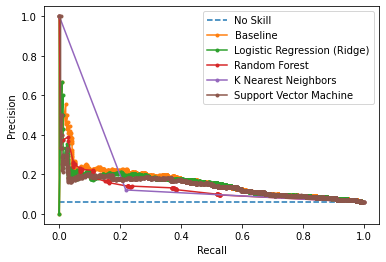

In [15]:
#Plot
from matplotlib import pyplot
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

pyplot.plot(base_recall, base_precision, marker='.', label='Baseline')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression (Ridge)')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
pyplot.plot(knn_recall, knn_precision, marker='.', label='K Nearest Neighbors')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Support Vector Machine')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [16]:
F_base = ((5*Recall_base*Precision_base) / ((4*Precision_base) + Recall_base))
F_lr = ((5*Recall_lr*Precision_lr) / ((4*Precision_lr) + Recall_lr))
F_rf = ((5*Recall_rf*Precision_rf) / ((4*Precision_rf) + Recall_rf))
F_svm = ((5*Recall_svm*Precision_svm) / ((4*Precision_svm) + Recall_svm))
F_knn = ((5*Recall_knn*Precision_knn) / ((4*Precision_knn) + Recall_knn))

base = [Acc_base, ROC_AUC_base, Recall_base, Precision_base, F1_base, F_base]
lr = [Acc_lr, ROC_AUC_lr, Recall_lr, Precision_lr, F1_lr, F_lr]
rf = [Acc_rf, ROC_AUC_rf, Recall_rf, Precision_rf, F1_rf, F_rf]
svm = [Acc_svm, ROC_AUC_svm, Recall_svm, Precision_svm, F1_svm, F_svm]
knn = [Acc_knn, ROC_AUC_knn, Recall_knn, Precision_knn, F1_knn, F_knn]

In [17]:
metrics = list(zip(base, rf, knn, svm, lr)) 

In [18]:
met = map(list, zip(*metrics))
df = pd.DataFrame(met, 
                  columns = ['Accuracy', 'AUC (ROC)', 'Recall', 'Precision', 'F1 Score', 'F Score'],
                 index = ['Baseline', 'Random Forest', 'K Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression' ])  

In [19]:
df

,Accuracy,AUC (ROC),Recall,Precision,F1 Score,F Score
Baseline,0.94050,0.505904,0.012605,0.500000,0.024590,0.015658
Random Forest,0.92950,0.529575,0.075630,0.225000,0.113208,0.087209
K Nearest Neighbors,0.85925,0.559137,0.218487,0.121212,0.155922,0.188269
Support Vector Machine,0.63525,0.654556,0.676471,0.104342,0.180797,0.322645
Logistic Regression,0.80800,0.661775,0.495798,0.154047,0.235060,0.343423
